# Surrogate Plots

Figures for the paper draft.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
#from sensible_raw.loaders import loader
from world_viewer.cns_world import CNSWorld
from world_viewer.glasses import Glasses
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from matplotlib.colors import LogNorm
from sklearn.utils import shuffle
from matplotlib.figure import figaspect

/home/kitzmann/Dropbox/PIK/Project: Jakob's thesis paper/master_thesis/world_viewer/cns_world.py:19: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  CNS_TIME_BEGIN = pd.Timestamp(pd.datetime(2013, 9, 2)) # first timestamp
/home/kitzmann/Dropbox/PIK/Project: Jakob's thesis paper/master_thesis/world_viewer/cns_world.py:20: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  CNS_TIME_END = pd.Timestamp(pd.datetime(2014, 12, 31)) # last timestamp
/home/kitzmann/Dropbox/PIK/Project: Jakob's thesis paper/master_thesis/world_viewer/cns_world.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  def __init__(self, path='', start=pd.datetime(2013, 9, 2), end=pd.datetime(2014, 12, 31)):


In [2]:
# set analysis params
analysis = 'expo_n'
opinion_type = "op_fitness"
binning = True
n_bins = 15
save_plots = False
show_plot = True

In [4]:
# load copenhagen data for comparison plots
cns_rw = CNSWorld()
cns_rw.load_world(opinions = ['fitness'], read_cached = False, stop=False, write_pickle = False, continous_op=False)
cns_glasses_rw = Glasses(cns_rw)
cns_data_rw = pd.read_pickle("tmp/final/spring_data.pkl")

Process opinion data for variable: fitness


In [35]:
# load surrogates 
# this data was calculated by the notebook 
#    * "5.2_Surrogate_Data_Testing_Surrogate1+2+5.ipynb"
#    * "5.2_Surrogate_Data_Testing_Surrogate3.ipynb"
#    * "5.2_Surrogate_Data_Testing_Surrogate4.ipynb"
#    * "SurrogateTestHomophily.ipynb"

surrogate1 = pd.read_pickle("tmp/final/surrogate1.pkl") #base
surrogate2 = pd.read_pickle("tmp/final/surrogate2.pkl") #individual activitiy level
surrogate3 = pd.read_pickle("tmp/final/surrogate3.pkl") #non-contagion + individual persistency
surrogate4 = pd.read_pickle("tmp/final/surrogate4.pkl") #group dynamics
surrogate5 = pd.read_pickle("tmp/final/surrogate5.pkl") #network structure
surrogate6 = pd.read_pickle("tmp/final/surrogate6.pkl") #homophily

x_max = 330
surrogate1 = surrogate1[surrogate1.exposure <= x_max]
surrogate2 = surrogate2[surrogate2.exposure <= x_max]
surrogate3 = surrogate3[surrogate3.exposure <= x_max]
surrogate4 = surrogate4[surrogate4.exposure <= x_max]
surrogate5 = surrogate5[surrogate5.exposure <= x_max]
surrogate6 = surrogate6[surrogate6.exposure <= x_max]

<IPython.core.display.Javascript object>


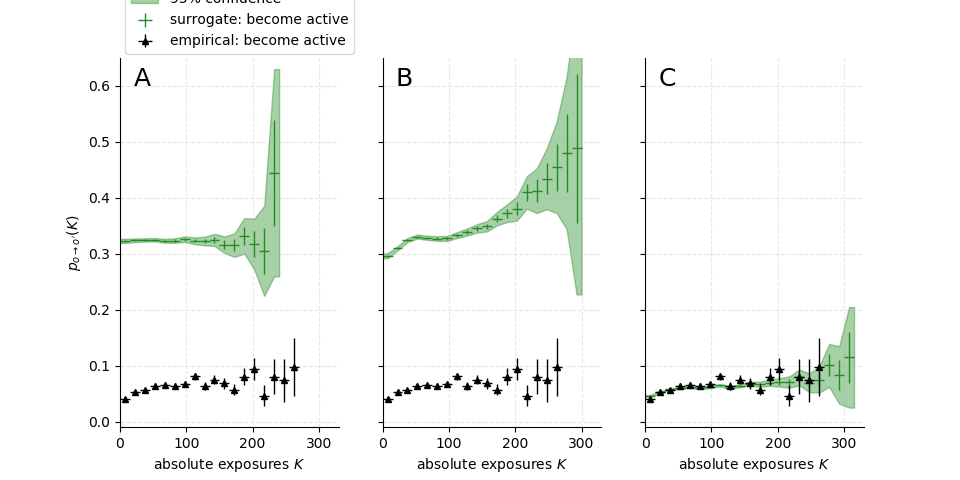

/home/lochnerpik@gmail.com/master/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


In [53]:
# plot trait surrogates (fig: 4 in the paper draft)
w, h = figaspect(0.5)
fig, ax = plt.subplots(1,3, figsize=(w,h))
cns_glasses_rw.output_folder = "final/"
q_binning=False
bin_width=15
n_bins=15
y_upper_lim = 0.65

cns_glasses_rw.plot_opinion_change_per_exposure_number(surrogate1[surrogate1.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=0, y_upper_lim = y_upper_lim, label="surrogate: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="forestgreen", x_lim=x_max, ci=True, fig=fig, ax=ax[0])
cns_glasses_rw.plot_opinion_change_per_exposure_number(surrogate2[surrogate2.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=0, y_upper_lim = y_upper_lim, label="surrogate: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="forestgreen", x_lim=x_max, ci=True, fig=fig, ax=ax[1], legend=False)
cns_glasses_rw.plot_opinion_change_per_exposure_number(surrogate3[surrogate3.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=0, y_upper_lim = y_upper_lim, label="surrogate: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="forestgreen", x_lim=x_max, ci=True, fig=fig, ax=ax[2], legend=False)

cns_glasses_rw.plot_opinion_change_per_exposure_number(cns_data_rw[cns_data_rw.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
          save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = y_upper_lim, label=r"empirical: become active", \
           q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax[0], marker="^", markersize=5)
cns_glasses_rw.plot_opinion_change_per_exposure_number(cns_data_rw[cns_data_rw.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
          save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = y_upper_lim, label=r"empirical: become active", \
           q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax[1], marker="^", markersize=5, legend=False)
cns_glasses_rw.plot_opinion_change_per_exposure_number(cns_data_rw[cns_data_rw.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
          save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = y_upper_lim, label=r"empirical: become active", \
           q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax[2], marker="^", markersize=5, legend=False)
ax[0].legend(bbox_to_anchor=(1.1, 1.21))

ax[0].set_title("A", y = 0.9, x = 0.1, fontsize=18)
ax[1].set_title("B", y = 0.9, x = 0.1, fontsize=18)
ax[2].set_title("C", y = 0.9, x = 0.1, fontsize=18)


fig.savefig("tmp/final/trait_surrogates.pdf" , bbox_inches='tight')

<IPython.core.display.Javascript object>


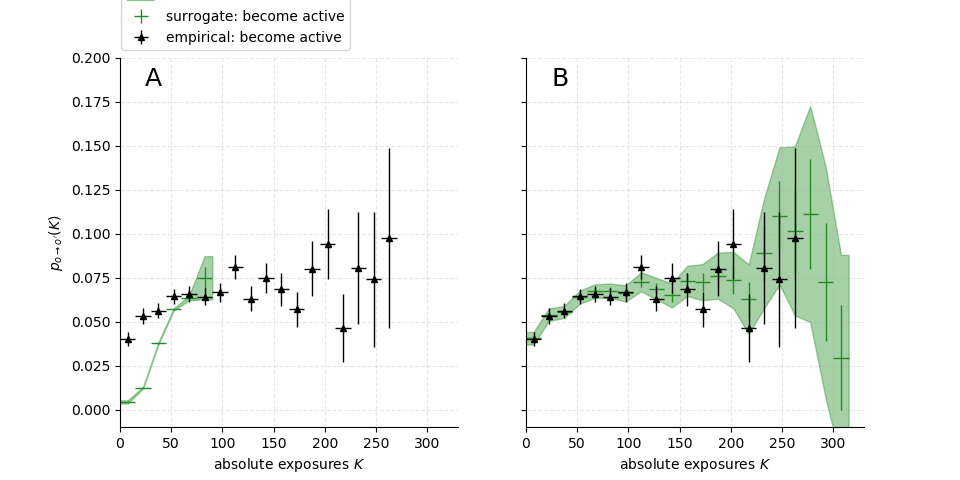

/home/lochnerpik@gmail.com/master/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


In [55]:
# plot edge surrogates (fig: 5 in the paper draft)

w, h = figaspect(0.5)
fig, ax = plt.subplots(1,2, figsize=(w,h))
cns_glasses_rw.output_folder = "final/"
q_binning=False
bin_width=15
n_bins=15
y_upper_lim = 0.2

cns_glasses_rw.plot_opinion_change_per_exposure_number(surrogate5[surrogate5.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=0, y_upper_lim = y_upper_lim, label="surrogate: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="forestgreen", x_lim=x_max, ci=True, fig=fig, ax=ax[0])
cns_glasses_rw.plot_opinion_change_per_exposure_number(surrogate6[surrogate6.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=0, y_upper_lim = y_upper_lim, label="surrogate: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="forestgreen", x_lim=x_max, ci=True, fig=fig, ax=ax[1], legend=False)

cns_glasses_rw.plot_opinion_change_per_exposure_number(cns_data_rw[cns_data_rw.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
          save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = y_upper_lim, label=r"empirical: become active", \
           q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax[0], marker="^", markersize=5)
cns_glasses_rw.plot_opinion_change_per_exposure_number(cns_data_rw[cns_data_rw.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
          save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = y_upper_lim, label=r"empirical: become active", \
           q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax[1], marker="^", markersize=5, legend=False)

ax[0].legend(bbox_to_anchor=(0.7, 1.22))
ax[0].set_title("A", y = 0.9, x = 0.1, fontsize=18)
ax[1].set_title("B", y = 0.9, x = 0.1, fontsize=18)
fig.savefig("tmp/final/edge_surrogates.pdf" , bbox_inches='tight')

<IPython.core.display.Javascript object>


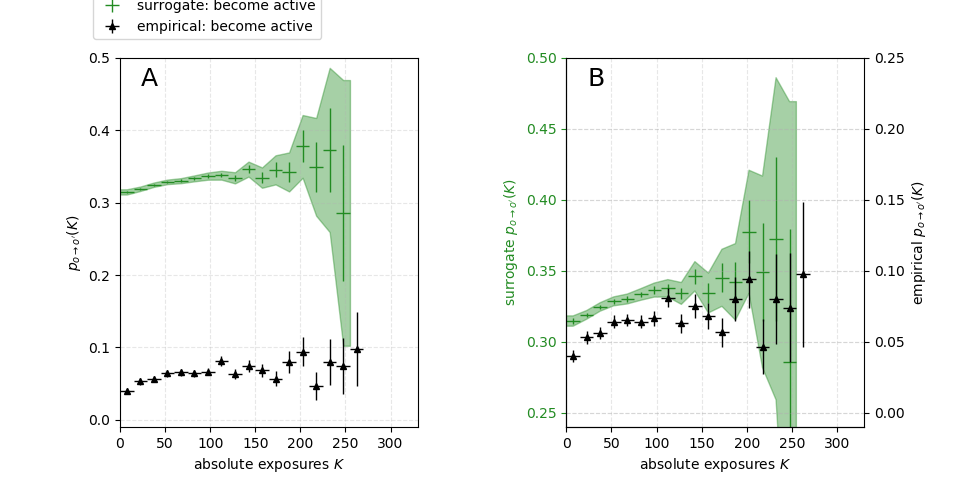

/home/lochnerpik@gmail.com/master/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


In [82]:
# plot trait surrogate (fig: 6 in the paper draft)

w, h = figaspect(0.5)
fig, ax = plt.subplots(1,2,figsize=(w,h))
bin_width=15
q_binning=False

cns_glasses_rw.plot_opinion_change_per_exposure_number(surrogate4[surrogate4.op_fitness == True], "expo_nmb", binning, n_bins, \
            save_plots, show_plot, label="surrogate: become active", q_binning = False, loglog=False, step_plot=True, color="forestgreen",y_lower_lim=0.24,y_upper_lim=0.5, \
            min_bin_size = 30, bin_width=15, x_lim=330,fig=fig, ax=ax[0], ci=True, ylabel="", retdata=True, borders=True)
cns_glasses_rw.plot_opinion_change_per_exposure_number(cns_data_rw[cns_data_rw.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = 0.5, label=r"empirical: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax[0], marker="^",lable_outer=False, ylabel="", markersize=5, borders=True, retdata=True)



ax3 = ax[1].twinx()  # instantiate a second axes that shares the same x-axis



cns_glasses_rw.plot_opinion_change_per_exposure_number(surrogate4[surrogate4.op_fitness == True], "expo_nmb", binning, n_bins, \
            save_plots, show_plot, label="surrogate: become active", q_binning = False, loglog=False, step_plot=True, color="forestgreen",y_lower_lim=0.24,y_upper_lim=0.5, \
            min_bin_size = 30, bin_width=15, x_lim=330,fig=fig, ax=ax[1], ci=True, ylabel="surrogate ", retdata=True,lable_outer=False, legend=False)
cns_glasses_rw.plot_opinion_change_per_exposure_number(cns_data_rw[cns_data_rw.op_fitness == True], "expo_nmb", binning, n_bins=n_bins, bin_width=bin_width, \
            save_plots=False, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = 0.25, label=r"empirical: become active", \
            q_binning = q_binning, loglog=False, step_plot=True, color="black", x_lim=x_max,fig=fig, ax=ax3, marker="^",lable_outer=False, ylabel="empirical ", \
                                                       markersize=5, borders=True, retdata=True, legend = False)

ax[0].legend(bbox_to_anchor=(0.7,1.25))
fig.subplots_adjust(wspace=0.5)
ax[1].tick_params(axis='y', colors='forestgreen')#
ax[1].yaxis.label.set_color('forestgreen')
ax[0].set_title("A", y = 0.9, x = 0.1, fontsize=18)
ax[1].set_title("B", y = 0.9, x = 0.1, fontsize=18)
fig.savefig("tmp/final/trait_surrogate_groudyn.pdf" , bbox_inches='tight')